In [1]:
import copy

import torch  # type: ignore
import torchvision  # type: ignore
from torch import nn  # type: ignore

from transforms.simclr import SimClrTransform
from data_modules.Parihaka_dataset import ParihakaDataset

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

https://docs.lightly.ai/self-supervised-learning/examples/byol.html

In [3]:
data_path = 'data/f3/images'

In [4]:
from transforms.byol import BYOLTransform
transforms = SimClrTransform()
dataset = ParihakaDataset(data_path + '/train', transform=transforms)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


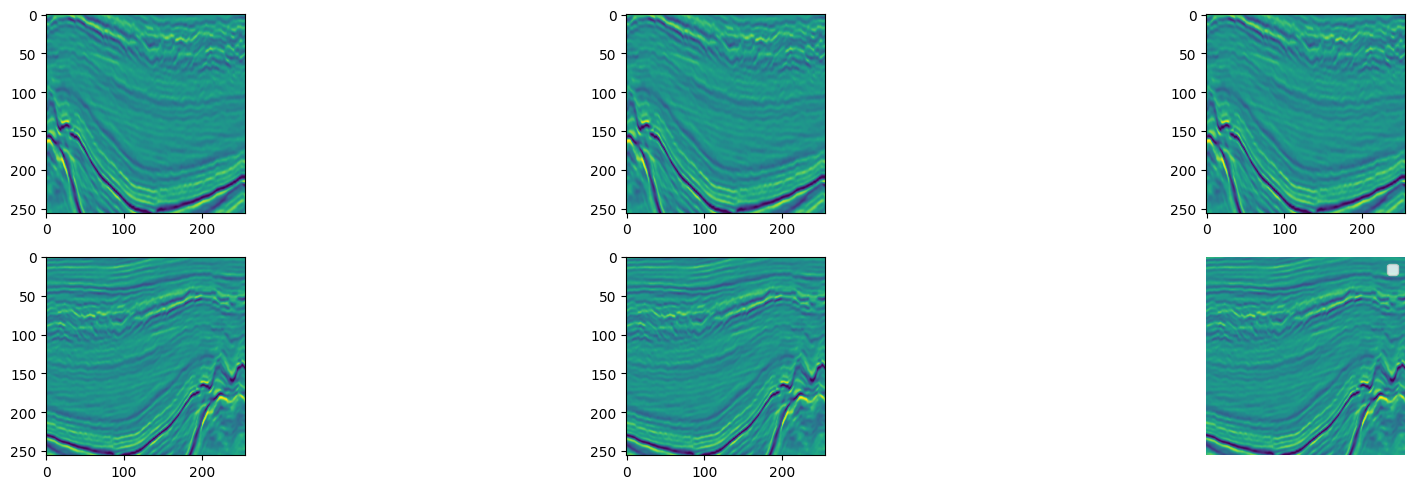

In [5]:
v1, v2 = dataset[0]
import matplotlib.pyplot as plt # type: ignore

fig, axs = plt.subplots(2, 3, figsize=(20, 5))

axs[0][0].imshow(v1[0])
axs[0][1].imshow(v1[1])
axs[0][2].imshow(v1[2])
axs[1][0].imshow(v2[0])
axs[1][1].imshow(v2[1])
axs[1][2].imshow(v2[2])
plt.axis('off')
plt.tight_layout()
plt.legend()
plt.show()

In [6]:
from models.deeplabv3 import DeepLabV3Backbone
from models.simclr import SimClrModel, SimClrProjectionHead

backbone_dlv3 = DeepLabV3Backbone()
projection_head = SimClrProjectionHead(depth=2)
model = SimClrModel(backbone_dlv3, projection_head)


In [7]:
temp = torch.rand((16, 3, 256, 256))
print(temp.shape)
out_online = model(temp)
print(out_online.shape)

torch.Size([16, 3, 256, 256])


torch.Size([16, 2097152])


In [8]:
from models.upconv_classifier import PredictionHead

prediction_head = PredictionHead()
finished = prediction_head(out_online.reshape(out_online.shape[0], 2048, 32, 32))
print(finished.shape)

torch.Size([16, 6, 128, 128])


(128, 128)


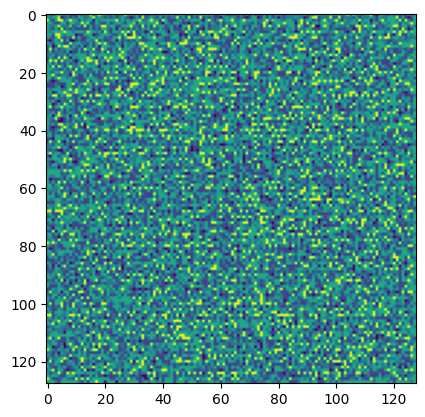

In [9]:
#plot finished
fig = finished[0].detach().cpu()
fig = torch.argmax(fig, axis=0).numpy()
print(fig.shape)

plt.imshow(fig)


In [10]:
from models.simclr import SimClrModel
from torch.utils.data import DataLoader

dl = DataLoader(dataset, batch_size=5, shuffle=True)

next_batch = next(iter(dl))

model = SimClrModel(backbone_dlv3, projection_head)
out_online = model.training_step(next_batch, batch_idx=0)
print(out_online.shape)
print(out_online[0])

torch.Size([10])
tensor(2.9953, grad_fn=<SelectBackward0>)


In [ ]:
torch.load("SimCLR_batch_5_100_best_bakcbone.pth")

In [11]:
import models.deeplabv3 as dlv
import models.byol as byol_module
from transforms.byol import BYOLTransform
from data_modules.Byol_dataset import ByolDataModule
from pytorch_lightning.loggers import CSVLogger
import os


ModuleNotFoundError: No module named 'lightly'

In [ ]:
data_path = '../data/seam_ai/images/train'

transforms = BYOLTransform(input_size=224)

datamodule = ByolDataModule(data_path, batch_size=32, num_workers=os.cpu_count(), transform=transforms)

setup: ['xl_95.tif', 'il_575.tif', 'il_513.tif', 'il_390.tif', 'il_400.tif', 'xl_219.tif', 'il_183.tif', 'il_221.tif', 'xl_311.tif', 'xl_145.tif', 'il_362.tif', 'xl_321.tif', 'xl_84.tif', 'xl_316.tif', 'il_410.tif', 'xl_403.tif', 'xl_236.tif', 'il_387.tif', 'xl_464.tif', 'il_396.tif', 'xl_285.tif', 'il_11.tif', 'xl_423.tif', 'xl_296.tif', 'il_200.tif', 'xl_443.tif', 'il_47.tif', 'xl_518.tif', 'il_492.tif', 'il_60.tif', 'xl_134.tif', 'xl_243.tif', 'il_368.tif', 'il_66.tif', 'xl_200.tif', 'il_94.tif', 'xl_111.tif', 'xl_500.tif', 'xl_387.tif', 'xl_226.tif', 'il_211.tif', 'xl_368.tif', 'xl_286.tif', 'xl_60.tif', 'il_122.tif', 'xl_487.tif', 'xl_242.tif', 'xl_176.tif', 'il_310.tif', 'xl_438.tif', 'xl_429.tif', 'xl_218.tif', 'il_39.tif', 'il_15.tif', 'xl_512.tif', 'il_46.tif', 'xl_284.tif', 'il_227.tif', 'il_461.tif', 'il_52.tif', 'xl_201.tif', 'xl_294.tif', 'il_353.tif', 'il_526.tif', 'xl_268.tif', 'xl_501.tif', 'il_333.tif', 'il_363.tif', 'xl_203.tif', 'il_454.tif', 'xl_164.tif', 'il_102.ti

In [ ]:
import os

path = '../data/seam_ai/images/train'

# Get all files in the directory
files = os.listdir(path)

# Print the files
for file in files:
    print(file)

xl_95.tif
il_575.tif
il_513.tif
il_390.tif
il_400.tif
xl_219.tif
il_183.tif
il_221.tif
xl_311.tif
xl_145.tif
il_362.tif
xl_321.tif
xl_84.tif
xl_316.tif
il_410.tif
xl_403.tif
xl_236.tif
il_387.tif
xl_464.tif
il_396.tif
xl_285.tif
il_11.tif
xl_423.tif
xl_296.tif
il_200.tif
xl_443.tif
il_47.tif
xl_518.tif
il_492.tif
il_60.tif
xl_134.tif
xl_243.tif
il_368.tif
il_66.tif
xl_200.tif
il_94.tif
xl_111.tif
xl_500.tif
xl_387.tif
xl_226.tif
il_211.tif
xl_368.tif
xl_286.tif
xl_60.tif
il_122.tif
xl_487.tif
xl_242.tif
xl_176.tif
il_310.tif
xl_438.tif
xl_429.tif
xl_218.tif
il_39.tif
il_15.tif
xl_512.tif
il_46.tif
xl_284.tif
il_227.tif
il_461.tif
il_52.tif
xl_201.tif
xl_294.tif
il_353.tif
il_526.tif
xl_268.tif
xl_501.tif
il_333.tif
il_363.tif
xl_203.tif
il_454.tif
xl_164.tif
il_102.tif
xl_72.tif
il_464.tif
xl_360.tif
il_75.tif
xl_276.tif
il_193.tif
il_563.tif
xl_355.tif
il_527.tif
il_318.tif
xl_49.tif
il_233.tif
xl_452.tif
il_236.tif
il_179.tif
xl_366.tif
xl_407.tif
il_213.tif
xl_304.tif
xl_315.tif
il_

In [ ]:
loader = datamodule.train_dataloader()
first_batch = next(iter(loader))
dataset = loader.dataset

In [ ]:
len(dataset), len(loader), len(first_batch)

(1121, 35, 2)

In [ ]:
len(first_batch[0]), len(first_batch[1])

(32, 32)

In [ ]:
first_image = first_batch[0][0]
second_image = first_batch[1][0]
len(first_image), len(second_image)

(3, 3)

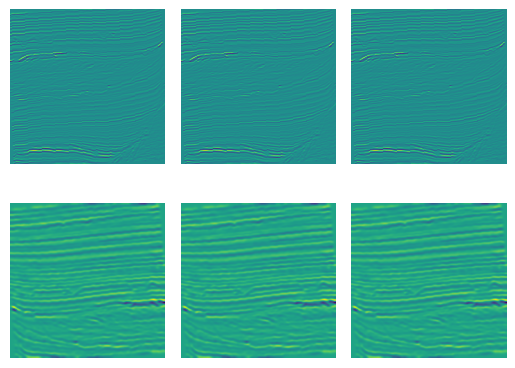

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have two lists of image paths for each line
line1_images = [first_image[0], first_image[1], first_image[2]]
line2_images = [second_image[0], second_image[1], second_image[2]]

# Create a figure with two rows and three columns
fig, axs = plt.subplots(2, 3)

# Plot images for line 1
for i, img in enumerate(line1_images):
    axs[0, i].imshow(img)
    axs[0, i].axis('off')

# Plot images for line 2
for i, img in enumerate(line2_images):
    axs[1, i].imshow(img)
    axs[1, i].axis('off')

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.1, hspace=0.1)

# Show the plot
plt.show()

In [ ]:
from models.deeplabv3 import DeepLabV3Model

In [ ]:
# This function should load the backbone weights
def load_pretrained_backbone(pretrained_backbone_checkpoint_filename):
#    loaded_model = MyModel()`
#    loaded_model.model = AutoModel.from_pretrained("path/to/save/model")

    backbone = dlv3.DeepLabV3Backbone()
    backbone.load_state_dict(torch.load(pretrained_backbone_checkpoint_filename))
    return backbone

In [ ]:
filename = 'best_results/seismic/Byol_pretrained_backbone_weights.pth'
backbone = load_pretrained_backbone(filename)
# print(backbone)

In [ ]:
input_teste = torch.rand((256, 3, 64, 64))

In [ ]:
out_teste = backbone(input_teste)
out_teste.shape

torch.Size([256, 2048, 8, 8])

In [ ]:
model = DeepLabV3Model(backbone)

In [ ]:
output = model(input_teste)
output.shape

torch.Size([256, 6, 64, 64])